# 01. グラフを描画する

---
## 目的

また，PythonとNumpy，Matplotlibを利用して，データをグラフに描画する．今回はPythonに初めて触れる者にも理解できるように細かい説明をつけている．ただし，C言語やLinuxについてある程度理解しておくことが望ましい．

## グラフの描画
下記のプログラムを実行すると，`data/car.txt`と`data/human.txt`の2つを読み込みグラフにする．グラフは`graph.png`として保存される．


## 準備
プログラムの動作に必要なデータをダウンロードし，zipファイルを解凍する．`！`で始まるコマンドはpythonではなく，Linux（Ubuntu）のコマンドを実行している．

In [ ]:
!wget -q http://www.mprg.cs.chubu.ac.jp/tutorial/ML_Lecture/sklearn/data.zip
!unzip -q data.zip
!ls
!ls ./data

replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
data  data.zip	data.zip.1  __MACOSX  sample_data
car.txt  human.txt


## モジュールのインポート
初めに，必要なモジュールを`import`文でインポートする．C/C++の`#include`に似ている．

ここでは，次のモジュールをインポートする：

- `path`：ファイル構造を取り扱うためのライブラリ
- `numpy`：数値計算ライブラリ※
- `matplotlib`：グラフ描画ライブラリ※

`from os import path`は「osという名前のパッケージ」が存在し，そこから「pathという名前のモジュール」をインポートするということになる．また，`import numpy as np`はインポートしたnumpyに対して「np」という名前をつけるということになる．


※ 本来ならば一部のモジュールライブラリは別途インストールが必要だが，配布した仮想環境は既に必要なモジュールライブラリが全てインストールされているため，インストールについては割愛する．

In [ ]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

##ファイルの読み込み
次に，ファイルを開いて配列に入れる．Pythonには「リスト」と言う配列に似たものが標準で実装されているが，今回はnumpyの機能である配列を利用する．

`path.join`はpathモジュール内にある関数で，パスを連結する関数である．ここでは`path.join('data', 'car.txt')`とあるので，`data/car.txt`を返す．

変数`in_txt1`と`in_txt2`にはそれぞれ`data/car.txt`と`data/human.txt`への参照が入ることになる．

In [ ]:
in_txt1 = open(path.join('data', 'car.txt'))
in_txt2 = open(path.join('data', 'human.txt'))

car = np.asarray([(line.strip()).split('\t') for line in in_txt1], dtype=float)
human = np.asarray([(line.strip()).split('\t') for line in in_txt2], dtype=float)

print(in_txt1)
print(in_txt2)

<_io.TextIOWrapper name='data/car.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/human.txt' mode='r' encoding='UTF-8'>


## 配列へ格納
続いて，ファイルの中身を参照して配列に入れる．`car = np.asarray([(line.strip()).split('\t') for line in in_txt1])`では，1行でいろいろなことをやっている．これは「リスト内包表記」と呼び，リストを生成するときに簡単に記述できるようにしたものである．
この1行をわかりやすく書き直すと次の通りになる：

In [ ]:
in_txt1 = open(path.join('data', 'car.txt'))

car = []
for line in in_txt1:
  car.append( (line.strip()).split('\t') )
car = np.asarray(car, dtype=float)

まず，`for line in in_txt1:`について説明する．このfor文の書き方はPython特有のものであり，ここでは「`in_txt1`の中身を変数`line`に1行ずつ入れて実行」という意味になる．これにより，テキストファイルを1行ずつ処理することができる．

続いて，`(line.strip()).split('\t')`の`line.strip()`は「文字列変数`line`から空白文字や改行コードを取り除く」ものである．これを行わずに処理を行うと，変数`line`に残っている改行コードが一緒に処理されてしまうため，変数やリストに改行コードが入ってしまうことになる．
さらに続けて`.split('\t')`と記述することにより，先程得られた改行コードのない文字列を「指定された文字列で区切る」ことができる．ここでは`'\t'`つまりタブが指定されているため，タブで区切る．`1512.000000 (タブ) 26.779374`という文字列があったとき，この処理を行うことで`['1512.000000', '26.779374']`という1つの1次元リストにすることができる．

以上の処理をテキストファイル全体に行ったあと，`np.asarray()`でnumpyの配列に変換している．


In [ ]:
print(car)

[[1512.         26.779374]
 [1802.         30.181811]
 [1624.         37.070186]
 [1595.         31.35323 ]
 [1705.         29.521916]
 [1595.         28.129919]
 [1740.         28.635195]
 [1920.         26.258527]
 [2046.         25.805478]
 [2304.         28.345481]
 [1980.         22.272106]
 [2184.         26.606136]
 [1855.         23.561031]
 [1980.         21.863881]
 [2223.         27.445359]
 [2301.         28.150374]
 [2840.         31.634094]
 [2652.         28.387444]
 [3096.         28.343877]
 [3010.         28.681518]
 [2706.         25.6541  ]
 [3234.         28.881692]
 [3243.         24.807416]
 [3430.         25.94729 ]
 [3834.         25.859545]
 [4400.         27.323686]
 [4218.         28.617058]
 [5124.         28.303789]
 [4503.         26.306446]
 [5146.         29.592637]
 [5355.         28.979888]
 [5056.         26.290137]
 [6090.         26.36577 ]
 [6336.         28.700233]
 [6825.         25.028423]
 [6106.         21.146658]
 [7998.         24.413585]
 

## グラフの描画
次に，matplotlibを用いてグラフの描画を行う．

### 1. グラフ描画の準備
fig = plt.figure()で，新規のプロットウィンドウを作成する．ペイントソフトで例えると「新しいキャンパスの作成」にあたる．
subfig = fig.add_subplot(1,1,1)は，プロットウィンドウにグラフを追加する．引数の1,1,1はそれぞれ行数,列数,何番目かを示す．ここではグラフは1つだけなので，すべて1で良い．
次の2行はグラフの描画エリアを示すものである．xminおよびyminはX軸およびY軸の最小値，xmaxおよびymaxはX軸およびY軸の最大値である．


### 2. データのプロット
Pythonのリストやnumpyの配列では，`car[:,0]`のように:(コロン)を使うことで「その配列の要素すべて」を表すことができる．ここでは，`car[0,0]`,`car[1,0]`,`car[2,0]`,`car[3,0]`......と参照する．グラフのX軸を`car[:,0]`つまりファイルの1列目，Y軸を`car[:,1]`つまりファイルの2列目といった具合でプロットする．

### 3. グラフのタイトルの追加と保存
最後に，タイトル，横軸ラベル，縦軸ラベルを追加して保存する．

プログラムの下部に赤と黒の散布図が表示されればOK．

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


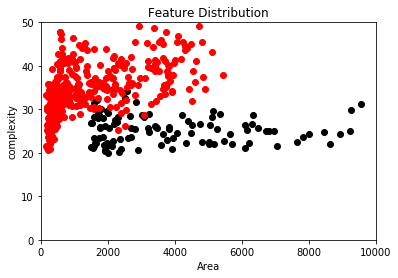

In [ ]:
# 1. グラフ描画の準備
fig = plt.figure()
subfig = fig.add_subplot(1,1,1)
plt.xlim(xmin=0, xmax = 10000)
plt.ylim(ymin=0, ymax = 50)

# 2. データのプロット
subfig.scatter(car[:,0], car[:,1],color='black')
subfig.scatter(human[:,0], human[:,1],color='red')

# 3. グラフのタイトルの追加と保存
subfig.set_title('Feature Distribution')
subfig.set_xlabel('Area')
subfig.set_ylabel('complexity')

plt.savefig("01_graph.png")
plt.show()

#課題

1. carのプロット点をblackではなくblueに変更せよ．
2. グラフのy軸の範囲を変更せよ．

##ヒント

1. `color=''`の記述を変えるだけ．
2. Yの最小値は20が良い．